In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-quality/apple_quality.csv


# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
dfog=pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv')
dfog

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [3]:
dfog.drop('A_id',axis=1,inplace=True)
dfog

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [4]:
dfog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [5]:
dfog=dfog.drop(4000)

In [6]:
dfog['Acidity'] = pd.to_numeric(dfog['Acidity'], downcast='float')

In [7]:
dfog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float32
 7   Quality      4000 non-null   object 
dtypes: float32(1), float64(6), object(1)
memory usage: 234.5+ KB


In [8]:
dfog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float32
 7   Quality      4000 non-null   object 
dtypes: float32(1), float64(6), object(1)
memory usage: 234.5+ KB


In [9]:
contains_inf = dfog.isin([np.inf, -np.inf]).any().any()
contains_inf #Does not contain any infinite value.

False

In [10]:
dfog.duplicated().sum() #No duplicates present

0

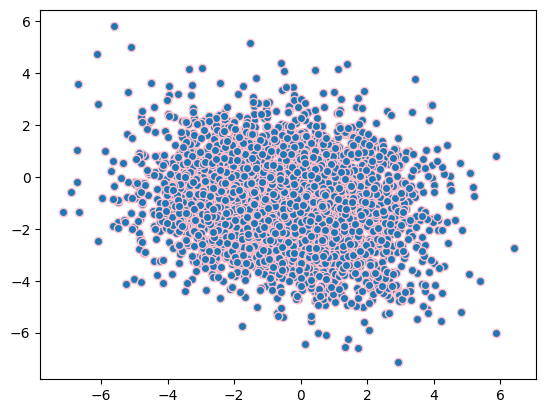

In [11]:
plt.scatter(dfog.Size,dfog.Weight,edgecolors='pink')

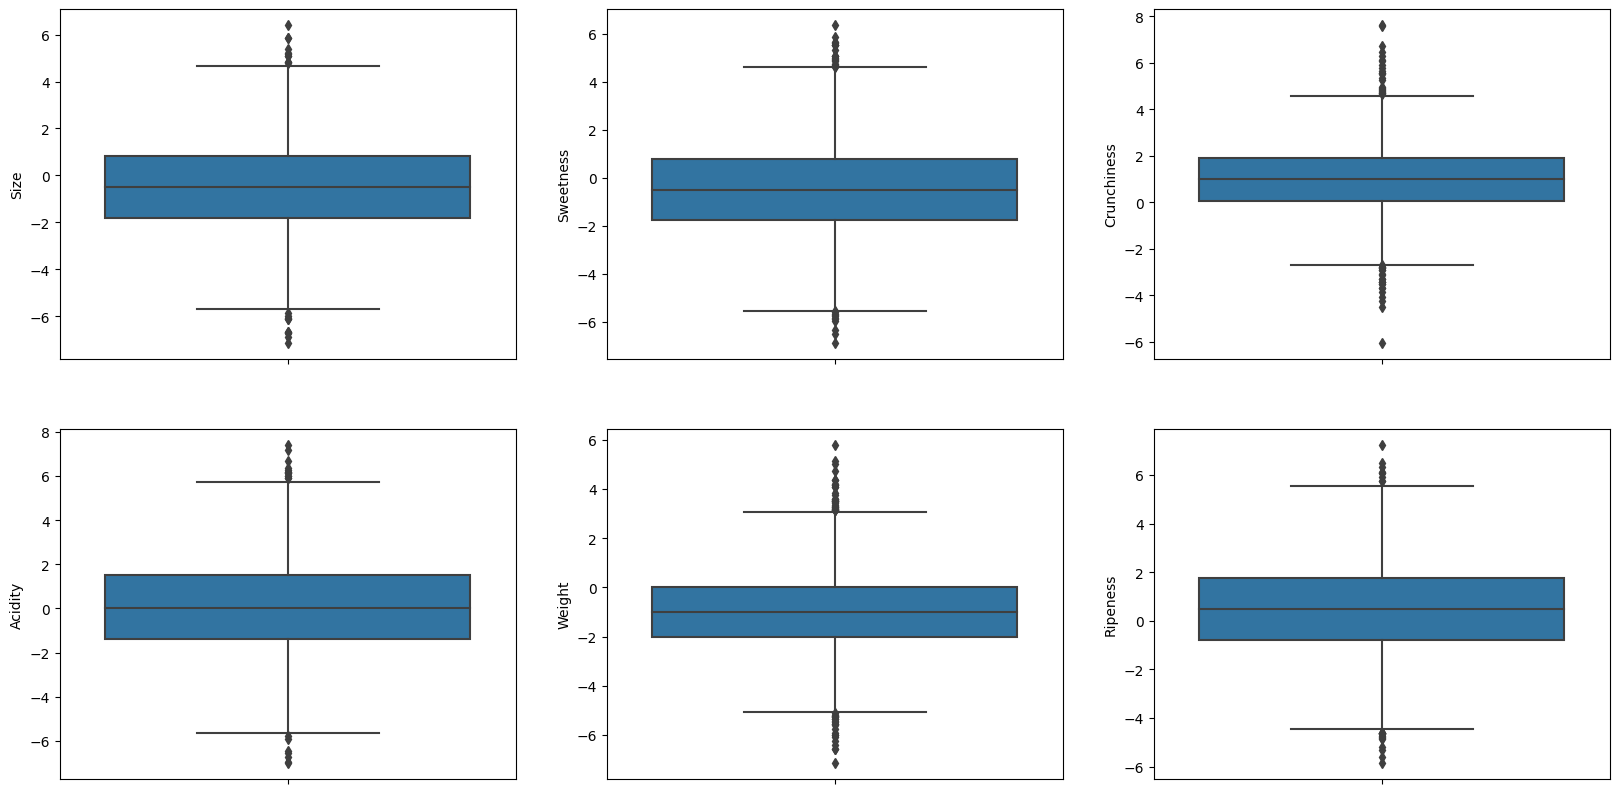

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(data=dfog,y='Size',ax=axes[0,0])
sns.boxplot(data=dfog,y='Sweetness',ax=axes[0,1])
sns.boxplot(data=dfog,y='Crunchiness',ax=axes[0,2])
sns.boxplot(data=dfog,y='Acidity',ax=axes[1,0])
sns.boxplot(data=dfog,y='Weight',ax=axes[1,1])
sns.boxplot(data=dfog,y='Ripeness',ax=axes[1,2])
plt.show() # Outliers exist.

In [13]:
for feat in dfog.drop('Quality',axis=1).columns:
    q3=dfog[feat].quantile(0.75)
    q1=dfog[feat].quantile(0.25)
    iqr=q3-q1
    up_lim=q3+(1.5*iqr)
    low_lim=q1-(1.5*iqr)
    dfog[feat]=np.where(dfog[feat]>up_lim,
                       up_lim,
                       np.where(dfog[feat]<low_lim,
                               low_lim,
                               dfog[feat]
                               )
                       )
    # Outliers handled using capping.

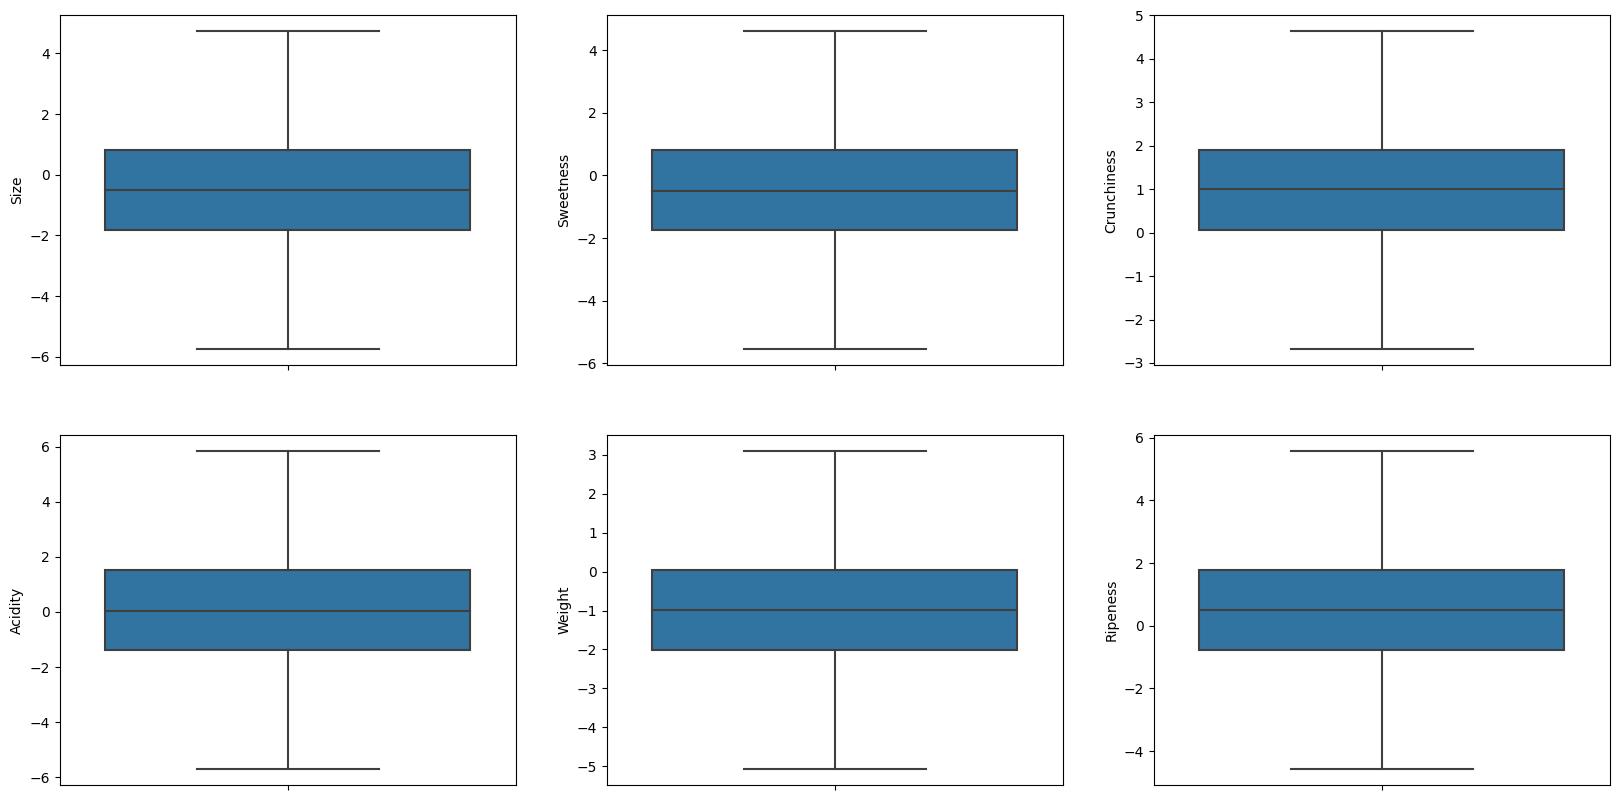

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(data=dfog,y='Size',ax=axes[0,0])
sns.boxplot(data=dfog,y='Sweetness',ax=axes[0,1])
sns.boxplot(data=dfog,y='Crunchiness',ax=axes[0,2])
sns.boxplot(data=dfog,y='Acidity',ax=axes[1,0])
sns.boxplot(data=dfog,y='Weight',ax=axes[1,1])
sns.boxplot(data=dfog,y='Ripeness',ax=axes[1,2])
plt.show() # Outliers don't exist anymore.

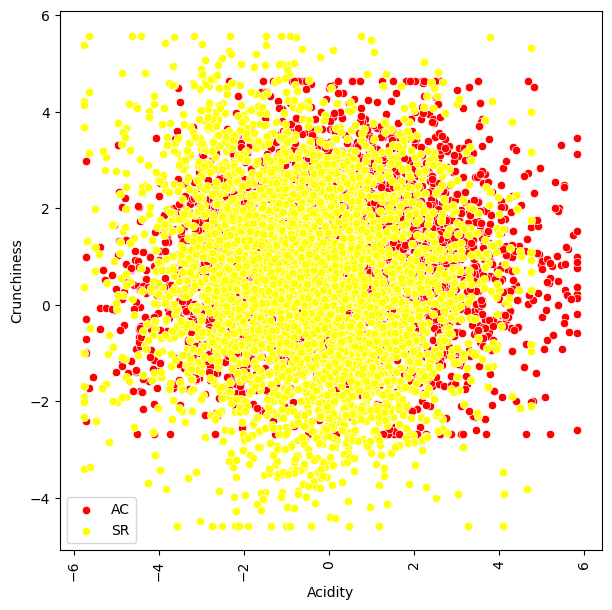

In [15]:
plt.figure(figsize=(7,7))
dfog['Acidity'] = pd.to_numeric(dfog['Acidity'], downcast='float')
sns.scatterplot(data=dfog,x='Acidity',y='Crunchiness',color='red',label='AC')
sns.scatterplot(x='Size',y='Ripeness',data=dfog,color='yellow',label='SR')
plt.xticks(rotation=90)
plt.legend()
plt.show()

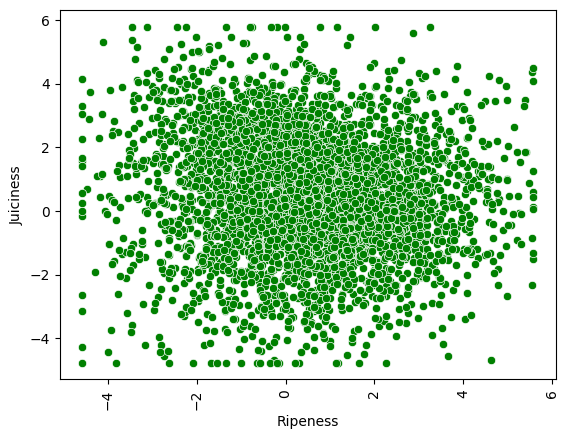

In [16]:

sns.scatterplot(data=dfog,x='Ripeness',y='Juiciness',color='green')
plt.xticks(rotation=90)
plt.show()

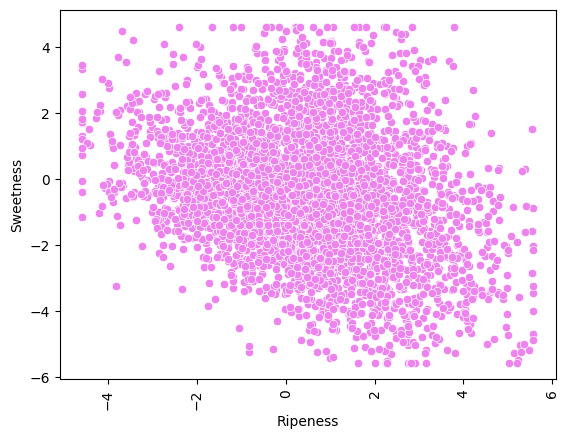

In [17]:
sns.scatterplot(data=dfog,x='Ripeness',y='Sweetness',color='violet')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Size', ylabel='Count'>

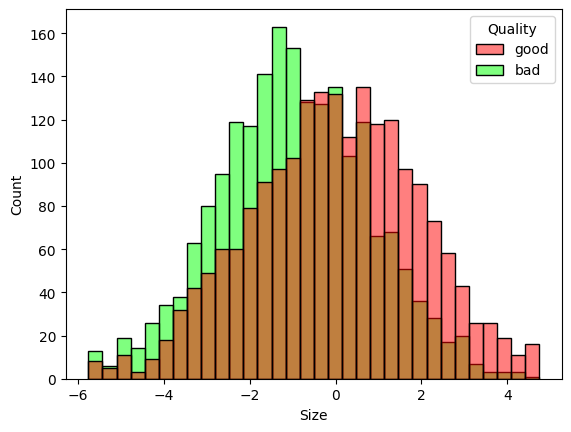

In [18]:
# Red, Green
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.histplot(x='Size',data=dfog,label='Size',hue='Quality',palette=["#FF0000", "#00FF00"])

<Axes: xlabel='Weight', ylabel='Count'>

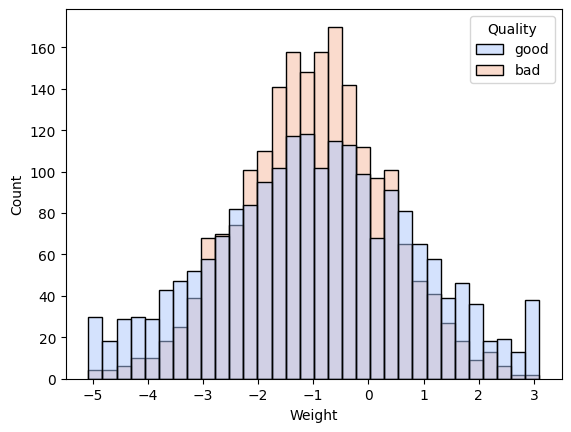

In [19]:
sns.histplot(x='Weight',data=dfog,label='Weight',hue='Quality',palette='coolwarm')

In [20]:
corr_table=dfog.drop('Quality',axis=1).corr()

<Axes: >

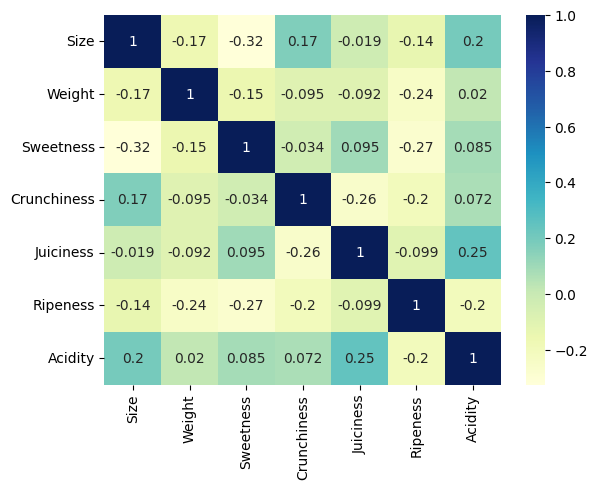

In [21]:
sns.heatmap(corr_table,cmap='YlGnBu',annot=True)

> Above heatmap shows some real correlation between weight & juice,weight & crunchiness,sweetness & juiciness.

<Axes: xlabel='Ripeness', ylabel='Count'>

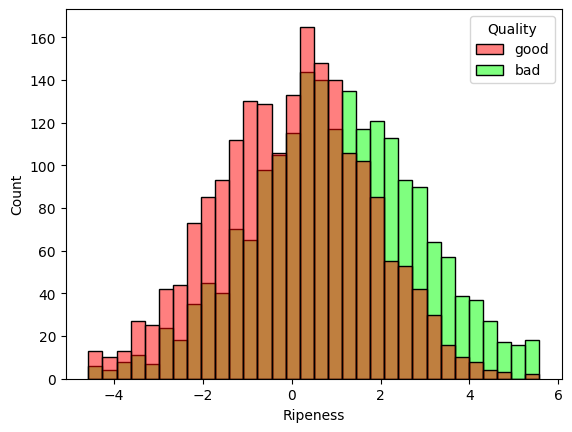

In [22]:
sns.histplot(x='Ripeness',data=dfog,hue='Quality',palette=["#FF0000", "#00FF00"]) #We can conclude that less ripeness value gives more good quality apples

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [24]:
numeric_cols=dfog.select_dtypes('float').columns.to_list()
numeric_cols
cat_cols='Quality'

In [25]:
ohe=OneHotEncoder(sparse=False)
qual_column_2d = dfog['Quality'].values.reshape(-1, 1)
ohe.fit(qual_column_2d)
qual_one_hot_encoded = ohe.transform(qual_column_2d)
df_qual_encoded = pd.DataFrame(qual_one_hot_encoded, columns=ohe.get_feature_names_out(['Quality']))
dfog = pd.concat([dfog, df_qual_encoded], axis=1)

In [26]:
dfog.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.502695,1.917446,-5.750201,-1.816765,-0.513703,0.805526,4.738963
Weight,4000.0,-0.991229,1.574517,-5.075890,-2.011770,-0.984736,0.030976,3.095097
Sweetness,4000.0,-0.472248,1.931684,-5.548946,-1.738425,-0.504758,0.801922,4.612442
Crunchiness,4000.0,0.984194,1.369437,-2.684440,0.062764,0.998249,1.894234,4.641439
Juiciness,4000.0,0.513127,1.917024,-4.757179,-0.801286,0.534219,1.835976,5.791870
Ripeness,4000.0,0.498102,1.866614,-4.578510,-0.771677,0.503445,1.766212,5.573044
Acidity,4000.0,0.076639,2.101441,-5.709300,-1.377424,0.022609,1.510493,5.842368
Quality_bad,4000.0,0.499000,0.500062,0.000000,0.000000,0.000000,1.000000,1.000000
Quality_good,4000.0,0.501000,0.500062,0.000000,0.000000,1.000000,1.000000,1.000000


In [28]:
scaler=MinMaxScaler()
scaler.fit(dfog[numeric_cols])
dfog[numeric_cols]=scaler.transform(dfog[numeric_cols])
dfog.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,0.500279,0.182803,0.0,0.375,0.499229,0.625,1.0
Weight,4000.0,0.499898,0.192696,0.0,0.375,0.500693,0.625,1.0
Sweetness,4000.0,0.499607,0.190100,0.0,0.375,0.496407,0.625,1.0
Crunchiness,4000.0,0.500777,0.186931,0.0,0.375,0.502696,0.625,1.0
Juiciness,4000.0,0.499600,0.181725,0.0,0.375,0.501600,0.625,1.0
Ripeness,4000.0,0.500082,0.183875,0.0,0.375,0.500609,0.625,1.0
Acidity,4000.0,0.500875,0.181917,0.0,0.375,0.496197,0.625,1.0
Quality_bad,4000.0,0.499000,0.500062,0.0,0.000,0.000000,1.000,1.0
Quality_good,4000.0,0.501000,0.500062,0.0,0.000,1.000000,1.000,1.0


# Model Selection

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [35]:
dfog

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Quality_bad,Quality_good
0,0.169713,0.313739,1.000000,0.228291,0.625846,0.483507,0.451684,good,0.0,1.0
1,0.434256,0.273729,0.906668,0.583230,0.531846,0.536473,0.431668,good,0.0,1.0
2,0.520363,0.455833,0.375000,0.319665,0.720047,0.447269,0.721189,bad,1.0,0.0
3,0.485549,0.343198,0.676465,0.353072,0.795821,0.114736,0.562691,good,0.0,1.0
4,0.678264,0.462524,0.508227,0.290946,0.738271,0.322577,0.537696,good,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
3995,0.553866,0.490575,0.180526,0.431005,0.611919,0.672071,0.506168,bad,1.0,0.0
3996,0.520259,0.859767,0.526003,0.279044,0.453283,0.343850,0.654757,good,0.0,1.0
3997,0.297039,0.359521,0.305911,0.456145,0.659480,0.920290,0.378706,bad,1.0,0.0
3998,0.166095,0.403446,0.778963,0.339087,0.655852,0.472144,0.301219,good,0.0,1.0


In [32]:
mod_par={
    
    'RFClas':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[5,10,20],
            'max_depth':[5,10,15],
            'min_samples_leaf':[2,3]
        }
    },
    
    'LogReg':{
        'model': LogisticRegression(solver='liblinear'),
        'params':{
            'C':[1,5,10]
        }
    },
    
    'GBClass':{
        'model': GradientBoostingClassifier(),
        'params':{
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 1],
        "max_depth": [3, 5, 10]
            
        }
    }
    
}

In [50]:
train_x=dfog.iloc[:,0:-3]
y_cols=['Quality_bad']
train_y=dfog[y_cols]
train_y=np.ravel(train_y) # Bcz. ,fit function requires array and not a column vector.np.ravel() converts to array.

In [51]:
scores = []
for model_name, mp in mod_par.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(train_x, train_y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


In [52]:
pd.set_option('display.max_columns',3)
pd.set_option('display.max_colwidth', 100) 
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,RFClas,0.871751,"{'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 20}"
1,LogReg,0.743498,{'C': 10}
2,GBClass,0.886251,"{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}"


> Now we have our ideal model i.e. Gradient Boosting Model with the given parameters.

# ----------FINISH---------